<a href="https://colab.research.google.com/github/t1seo/AIFFEL_Hackerthon-1/blob/main/AIFFEL_Hackerthon-1/taewon/genre_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data/Restaurant_Visitor_Forecasting

/content/drive/MyDrive/data/Restaurant_Visitor_Forecasting


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [8]:
air_reserve = pd.read_csv('air_reserve.csv')
hpg_reserve = pd.read_csv('hpg_reserve.csv')
air_store_info = pd.read_csv('air_store_info.csv')
hpg_store_info = pd.read_csv('hpg_store_info.csv')
store_id_relation = pd.read_csv('store_id_relation.csv')
air_visit_data = pd.read_csv('air_visit_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')
date_info = pd.read_csv('date_info.csv')

## Air Store

In [21]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [32]:
air_genre = air_store_info[['air_genre_name']]
air_genre.head()

,air_genre_name
0,Italian/French
1,Italian/French
2,Italian/French
3,Italian/French
4,Italian/French


In [33]:
air_genre.value_counts()

air_genre_name              
Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Karaoke/Party                     2
International cuisine             2
Asian                             2
dtype: int64

In [38]:
air_genre = air_store_info["air_genre_name"].value_counts().reset_index()
air_genre

,index,air_genre_name
0,Izakaya,197
1,Cafe/Sweets,181
2,Dining bar,108
3,Italian/French,102
4,Bar/Cocktail,79
5,Japanese food,63
6,Other,27
7,Yakiniku/Korean food,23
8,Western food,16
9,Okonomiyaki/Monja/Teppanyaki,14


In [40]:
air_genre = air_genre.rename(columns={"index":"air_genre", "air_genre_name":"count"})
air_genre

,air_genre,count
0,Izakaya,197
1,Cafe/Sweets,181
2,Dining bar,108
3,Italian/French,102
4,Bar/Cocktail,79
5,Japanese food,63
6,Other,27
7,Yakiniku/Korean food,23
8,Western food,16
9,Okonomiyaki/Monja/Teppanyaki,14


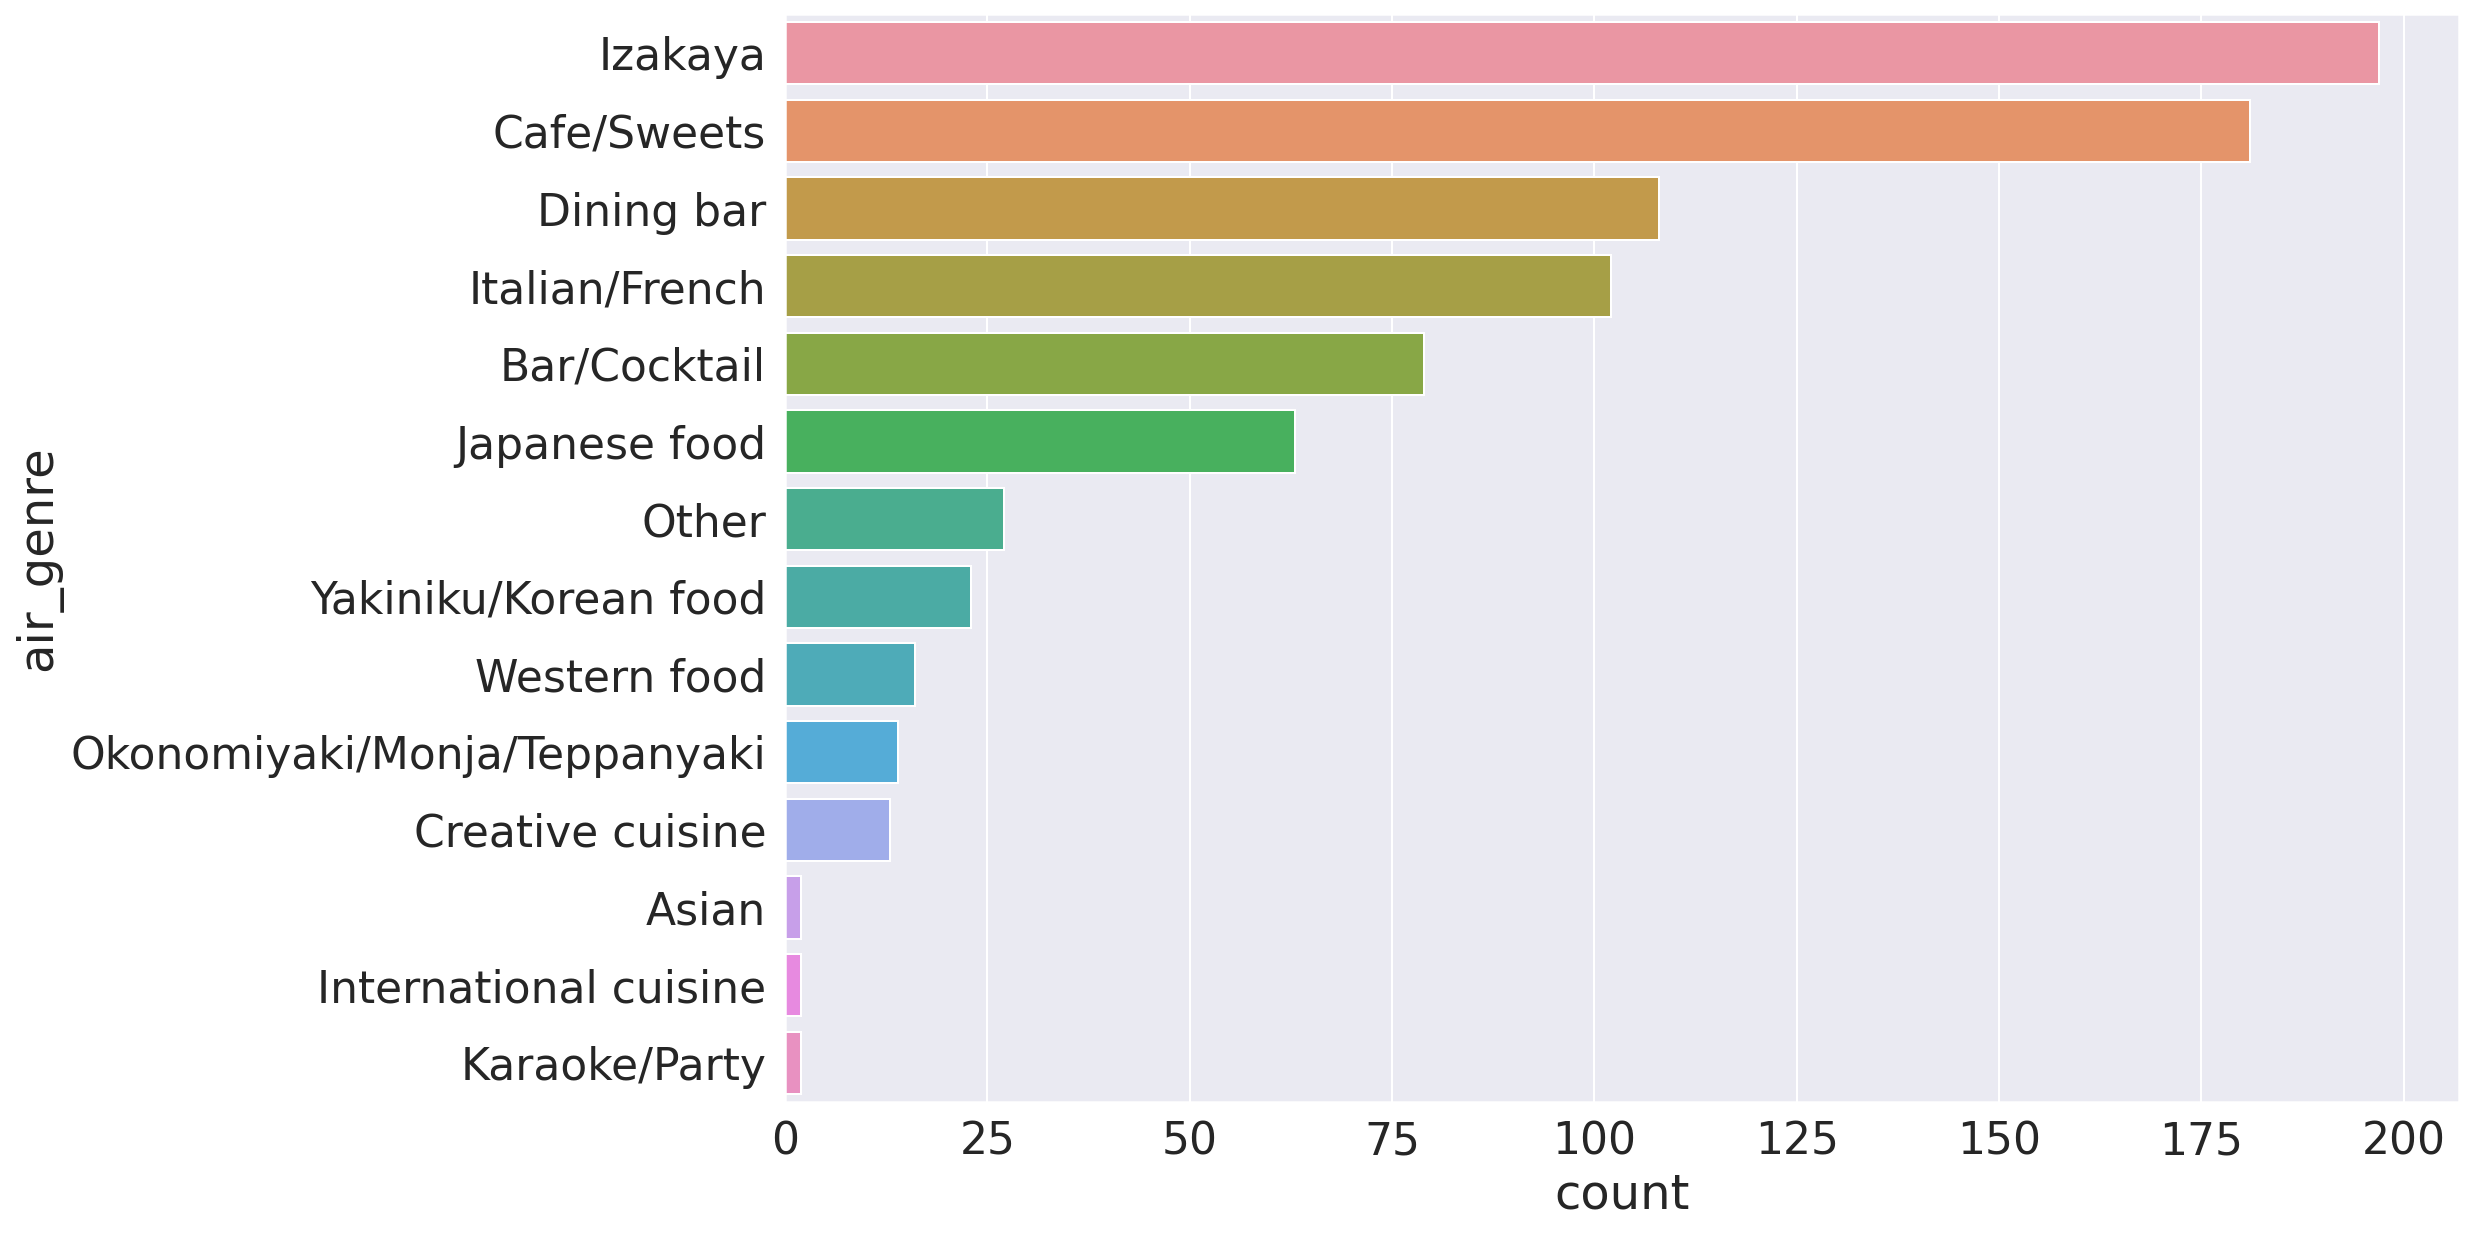

In [46]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=2) 
sns.barplot(y = air_genre["air_genre"], x = air_genre["count"])

In [50]:
air_area = air_store_info["air_area_name"].value_counts().reset_index()
air_area

,index,air_area_name
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Tōkyō-to Shibuya-ku Shibuya,58
2,Tōkyō-to Minato-ku Shibakōen,51
3,Tōkyō-to Shinjuku-ku Kabukichō,39
4,Tōkyō-to Setagaya-ku Setagaya,30
...,...,...
98,Tōkyō-to Setagaya-ku Sangenjaya,2
99,Tōkyō-to Shibuya-ku Dōgenzaka,2
100,Fukuoka-ken Fukuoka-shi Imaizumi,2
101,Ōsaka-fu Ōsaka-shi Nanbasennichimae,2


In [51]:
air_area = air_area.rename(columns={"index":"air_area", "air_area_name":"count"})
air_area

,air_area,count
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Tōkyō-to Shibuya-ku Shibuya,58
2,Tōkyō-to Minato-ku Shibakōen,51
3,Tōkyō-to Shinjuku-ku Kabukichō,39
4,Tōkyō-to Setagaya-ku Setagaya,30
...,...,...
98,Tōkyō-to Setagaya-ku Sangenjaya,2
99,Tōkyō-to Shibuya-ku Dōgenzaka,2
100,Fukuoka-ken Fukuoka-shi Imaizumi,2
101,Ōsaka-fu Ōsaka-shi Nanbasennichimae,2


In [55]:
air_area = air_area.loc[:15, :]
air_area

,air_area,count
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Tōkyō-to Shibuya-ku Shibuya,58
2,Tōkyō-to Minato-ku Shibakōen,51
3,Tōkyō-to Shinjuku-ku Kabukichō,39
4,Tōkyō-to Setagaya-ku Setagaya,30
5,Tōkyō-to Chūō-ku Tsukiji,29
6,Ōsaka-fu Ōsaka-shi Ōgimachi,25
7,Hiroshima-ken Hiroshima-shi Kokutaijimachi,23
8,Tōkyō-to Meguro-ku Kamimeguro,22
9,Hokkaidō Sapporo-shi Minami 3 Jōnishi,21


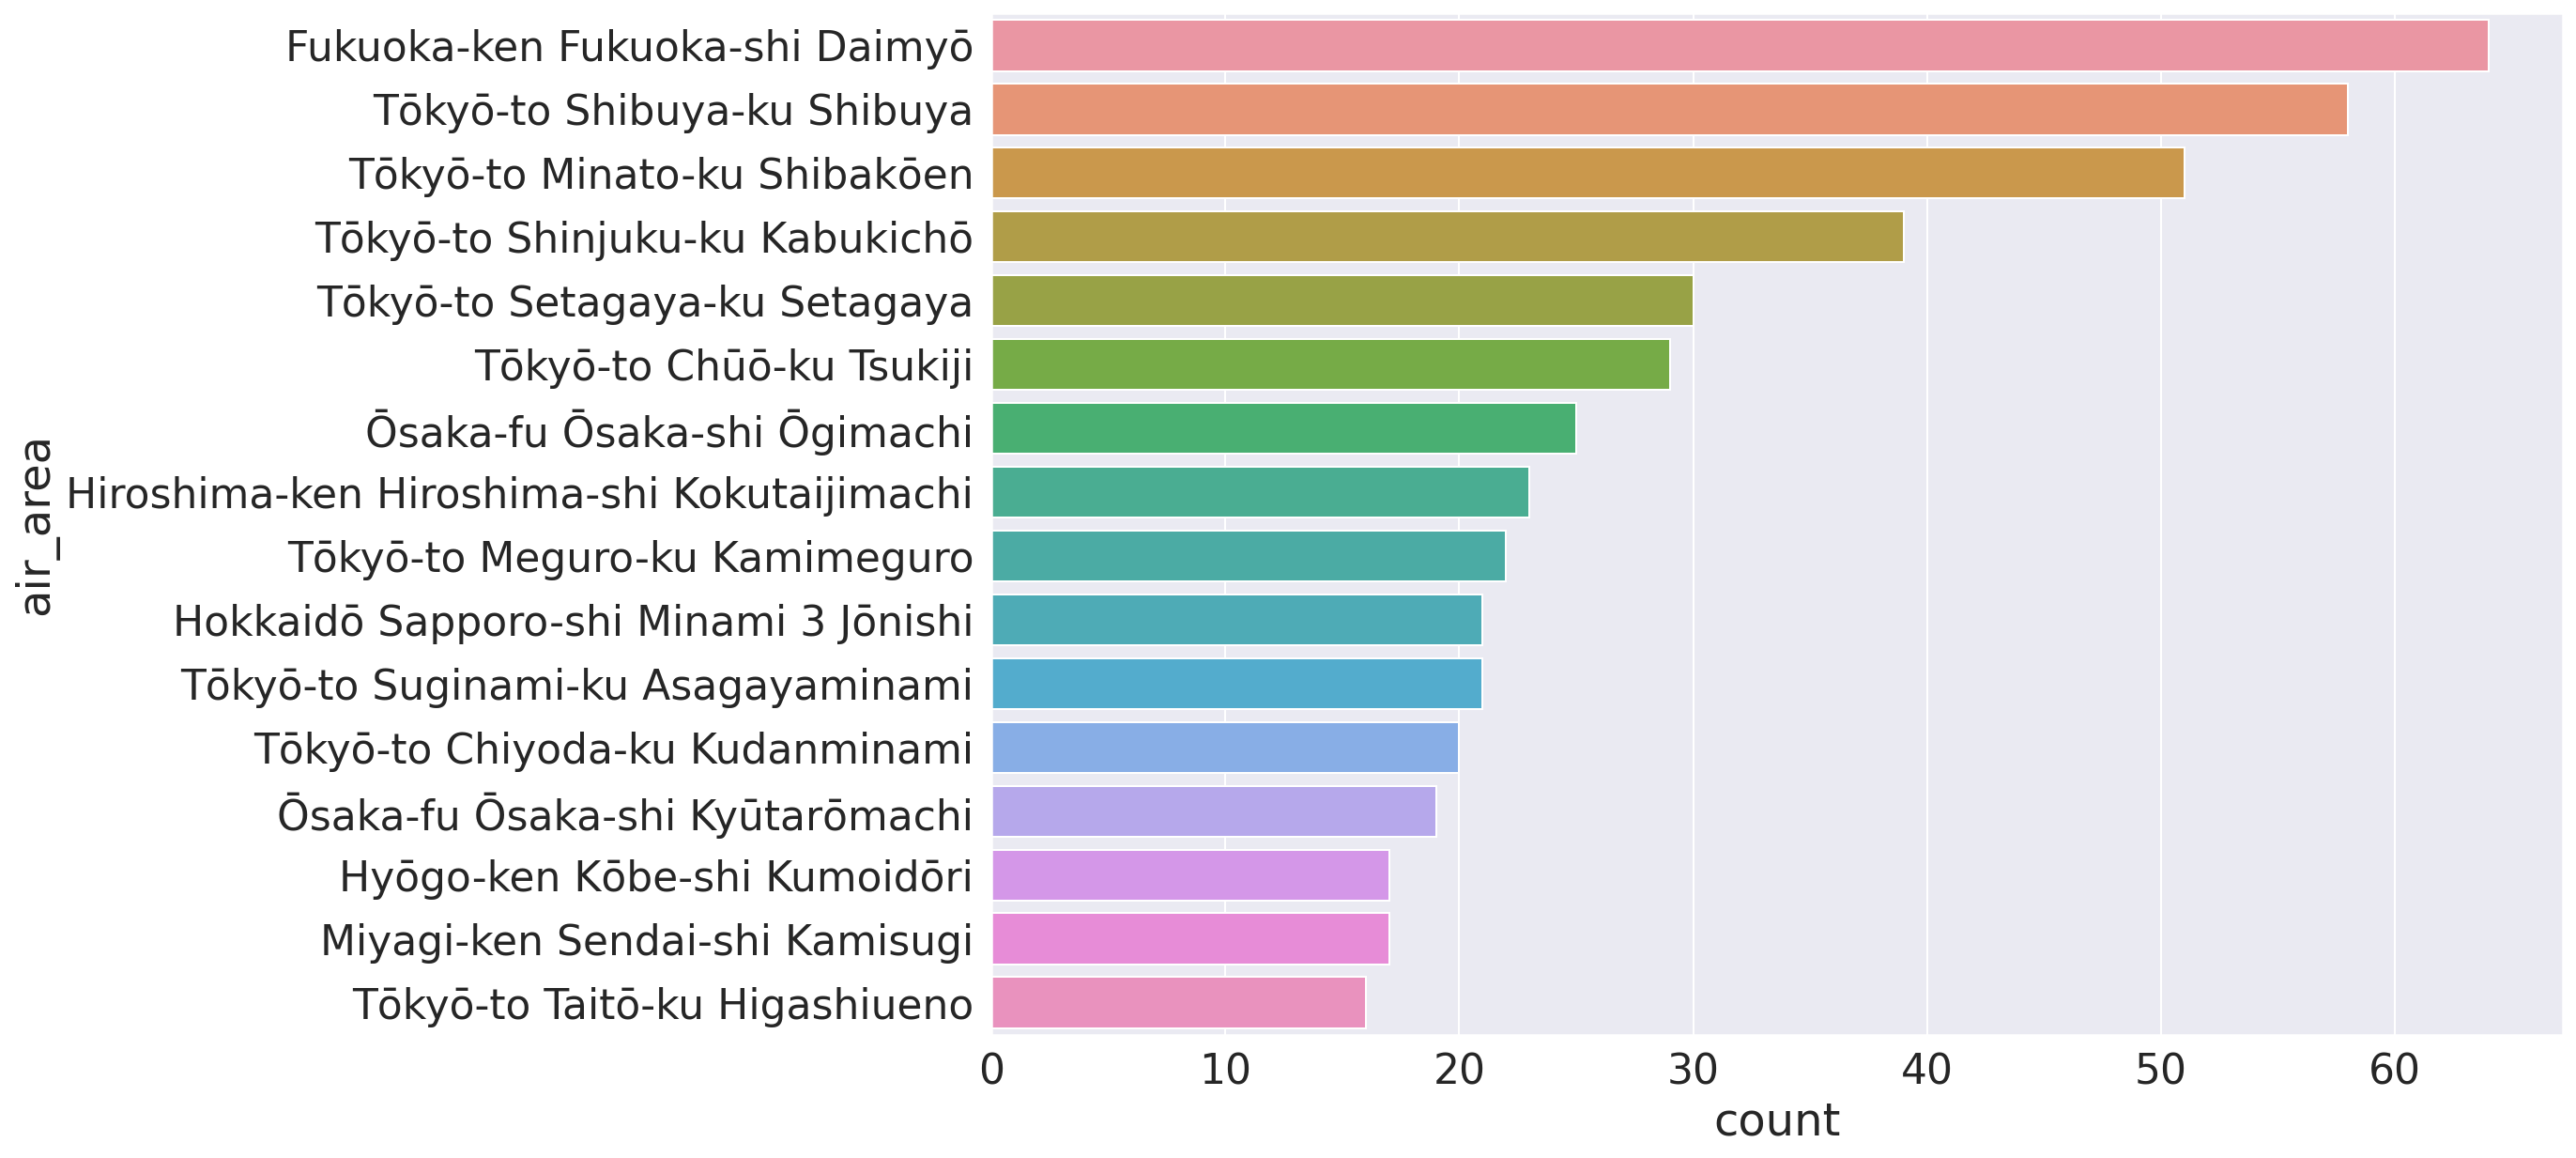

In [56]:
plt.figure(figsize=(15, 10))
sns.barplot(y = air_area["air_area"], x = air_area["count"])

## hpg_store